# Step 1 - Libraries

## Configuration Libraries

In [1]:
import warnings # used to remove unnecessary pop ups or warnings
warnings.filterwarnings("ignore")

## Classical Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# matplot lib is not much used now a days because
# 1. it is old
# 2. syntaxes are very lengthy
plt.style.use('dark_background')
import seaborn as sns

## Machine Learning Libraries

In [3]:
!pip install pmdarima
# pdarima. It's short for "Python Matrix ARIMA"

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import itertools
from sklearn.metrics import *
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 2 - Data Loading Phase (Data Ingestion)

## Data Loading

In [5]:
df = pd.read_csv('AirPassengers.csv')

## Data inspection

In [6]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
a = df.shape
print(f"Rows: {a[0]} & Columns: {a[1]}")

Rows: 144 & Columns: 2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
# insights
# the column month should be in date and time format

In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
"""
Time series models (like ARIMA, SARIMA, Prophet, etc.) and visualizations (like line plots) expect a DatetimeIndex, 
because they rely on the temporal order of data.

By setting Month as the index, you:

Tell pandas that this data is time-dependent.
Enable easier resampling (.resample('M')), rolling windows, and time-aware slicing.
Make plots cleaner and more informative.
"""

"\nTime series models (like ARIMA, SARIMA, Prophet, etc.) and visualizations (like line plots) expect a DatetimeIndex, \nbecause they rely on the temporal order of data.\n\nBy setting Month as the index, you:\n\nTell pandas that this data is time-dependent.\nEnable easier resampling (.resample('M')), rolling windows, and time-aware slicing.\nMake plots cleaner and more informative.\n"

In [13]:
df.set_index('Month', inplace = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


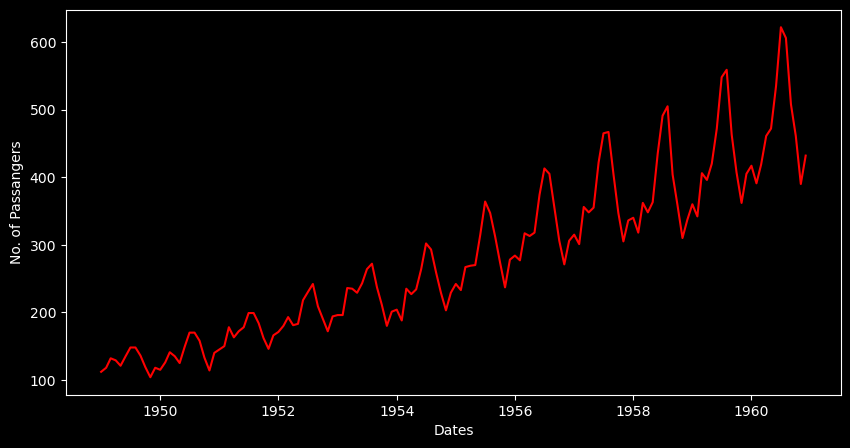

In [14]:
plt.figure(figsize = (10,5))
plt.plot(df,color = 'red')
plt.xlabel('Dates')
plt.ylabel('No. of Passangers')
plt.show()

In [15]:
# the data shows an increasing trend, moreover we can also say that this is a
# seasonal upward trend
# there is a chance that data might not be stationary by simply visualizing, since we can
# observe that mean and variance are not constant

# Step 3 - check for stationarity
- we need to ensure that mean and variance are constant

In [16]:
# Rolling statistics

# Rolling Mean
rolling_mean = df.rolling(window = 12).mean()# 12 for months

# rolling std dev (1 year time frame)
rolling_std = df.rolling(window = 12).std()

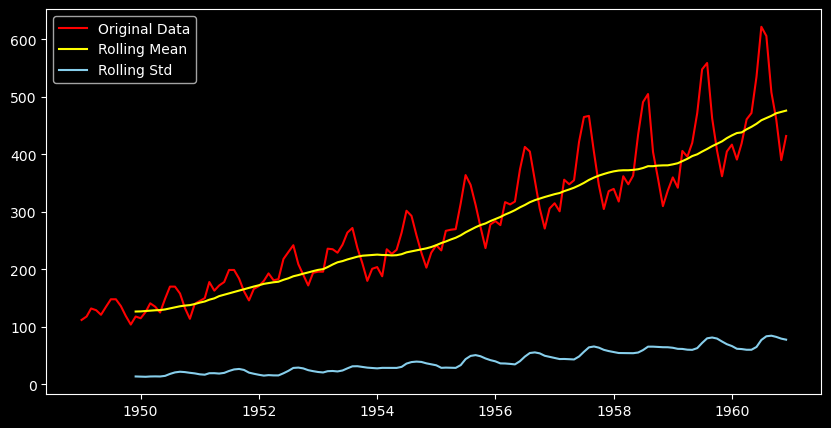

In [17]:
# visualising
plt.figure(figsize = (10,5))
original_data = plt.plot(df, color = "red", label = "Original Data")
mean_data = plt.plot(rolling_mean, color = 'yellow', label = 'Rolling Mean')
std_data = plt.plot(rolling_std, color = 'skyblue', label = 'Rolling Std')
plt.legend()
plt.show()

In [18]:
# the mean is increasing with respect to time, variance is not so stable

### **ADFuller - Augmented Dickey Fuller Test**
  * **This is a tool for checking stationarity statistically**
  * **What's the condition of stationarity**
    * **If the p-value is low (< 0.05) -> Stationary**
    * **If the p-value is high (> 0.05) -> Stationary**

In [19]:
results = adfuller(df)
results

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [20]:
print(f'p-value : {results[1]}')

p-value : 0.991880243437641


In [21]:
if results[1]>0.05:
    print("Non-Stationary")
else:
    print("Stationary")

Non-Stationary


In [22]:
def check_stationary(df):
    rolling_mean = df.rolling(window = 12).mean()
    rolling_std = df.rolling(window = 12).std()

    plt.figure(figsize = (10,5))
    plt.plot(df, color = 'red', label = 'Original Data')
    plt.plot(rolling_mean, color = 'yellow', label = 'Rolling Mean')
    plt.plot(rolling_std, color = 'skyblue', label = 'Rolling standard deviation')
    plt.xlabel('Dates')
    plt.ylabel('No. of Passangers')
    plt.legend()
    plt.show()

    results = adfuller(df)
    print(f'p-value : {results[1]}') 
    if results[1]>0.05:
        print("Non - Stationary")
    else:
        print("Stationary")    

# **Step 4 - Achieve the stationary**
  * **Transformation: We can scale the values, this helps you to make your variance constant**
  * **Differencing / Shift**

### **Transformation**
  * **Normalize Data: To make value more comparable**
  * **Stablize the variance**
  * **More Linear Relationship**

In [23]:
print("""
Problem             | Technique Needed
Increasing trend    | Differencing
Increasing variance | Log transformation
Both                | Log transform → then difference
""")


Problem             | Technique Needed
Increasing trend    | Differencing
Increasing variance | Log transformation
Both                | Log transform → then difference



In [24]:
# Log Transformation

In [25]:
df_log_orig = np.log(df)

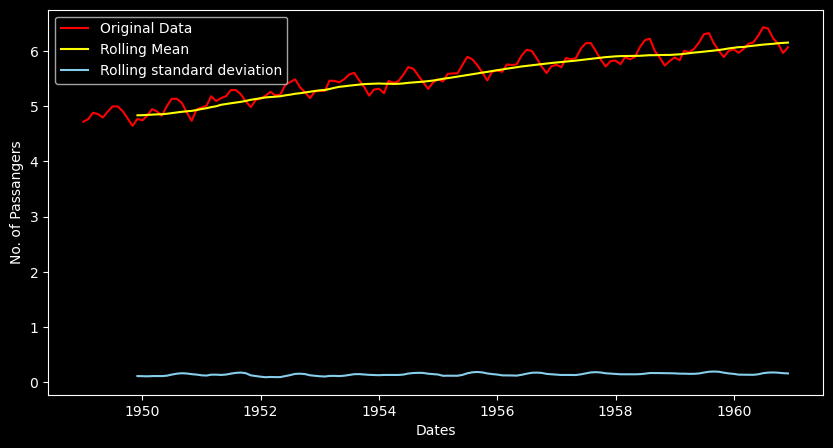

p-value : 0.42236677477039125
Non - Stationary


In [27]:
check_stationary(df_log_orig)

**Transformation adjusts data for consistent variance and stationarity to refine insights and analytical accuracy.**

### **Differencing**
  * **It is the technique of substracting the previous value with the current values**
  * **y't = yt - y(t-1)**

In [28]:
# first order differencing
df_log_diff1 = df_log_orig.diff().dropna()

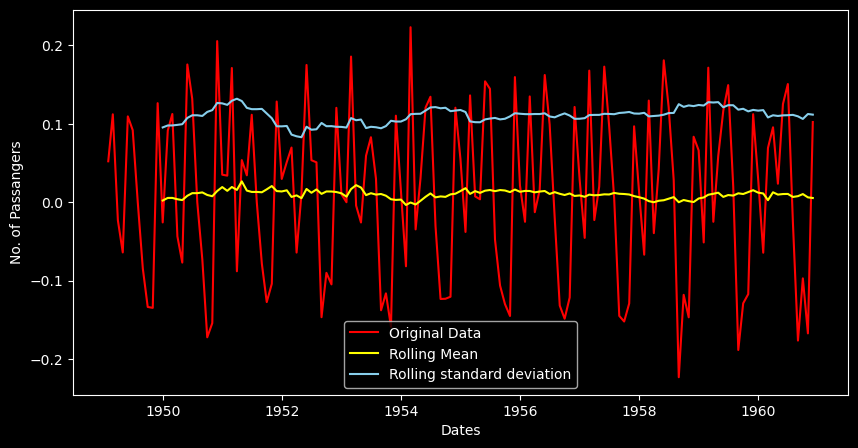

p-value : 0.07112054815085875
Non - Stationary


In [29]:
check_stationary(df_log_diff1)

In [30]:
# second order differencing
df_log_diff2 = df_log_orig.diff().diff().dropna()

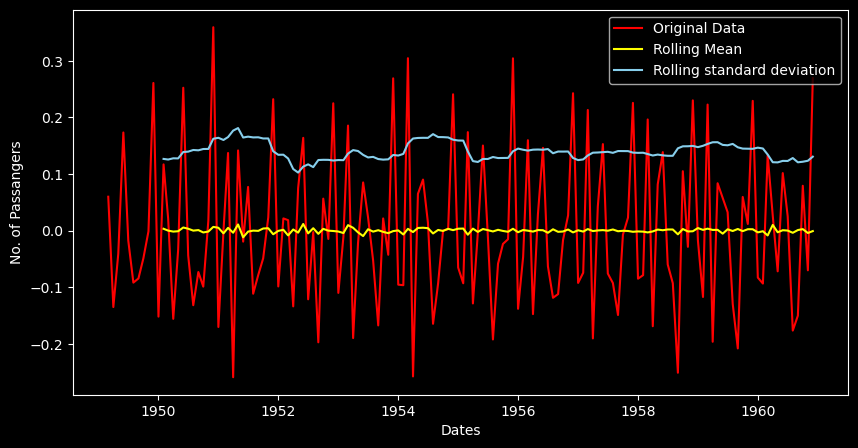

p-value : 7.419304549376505e-13
Stationary


In [31]:
check_stationary(df_log_diff2)

# **Step 5 - Discovering the order of the models**

### **Auto Correlation Function (ACF) and Partial AutoCorrelation Function(PACF)**

#### **Auto Correlation Function (ACF)**
  * **This measure the correlation between a time series (Current) with the previous timestamps**

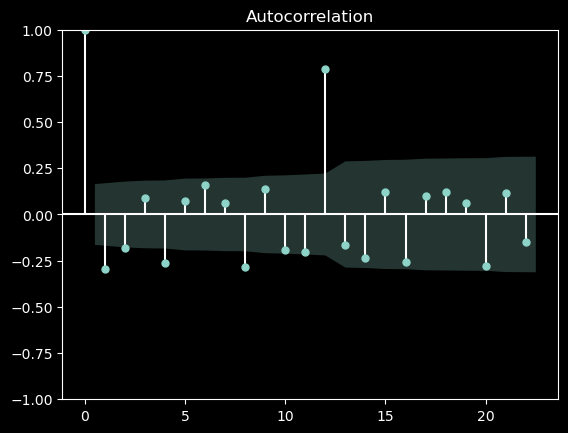

In [32]:
plot_acf(df_log_diff2)
plt.show()
plt.close()

In [33]:
# if there are peaks then there is seasonality
# to see order see sharp  change to 0, here 4
# only those outside grey reason are significant
print("""
So from this plot:
we can try p = 1 or p = 0 or p = 4 or p = 12 or p = 8, depending on PACF

Seasonal ARIMA (SARIMA) might be more appropriate here since there's strong seasonal behavior at lag 12
""")



So from this plot:
we can try p = 1 or p = 0 or p = 4 or p = 12 or p = 8, depending on PACF

Seasonal ARIMA (SARIMA) might be more appropriate here since there's strong seasonal behavior at lag 12



#### **Partial Auto Correlation Function (ACF)**
  * **one to one correlation by ignoring the in-between data**

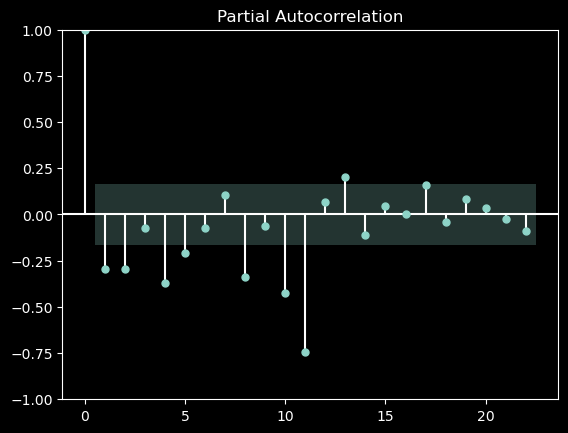

In [34]:
plot_pacf(df_log_diff2)
plt.show()
plt.close()

In [35]:
# PACF cutoffs after 1,
# here we see corelation and here we can see after lag 1 it goes completly negative
# q = 1,2,4,5,8,10,11,13
# p from ACF, q from PACF, d - differencing

# **Step 6 - Model Building**

In [36]:
# AIC is metrics helps us check the goodness of model
# the lower the value of AIC the better
print("""
possible p values = 1,0,4,8,12
possible q values = 1,2,4,5,8,10,11,13
"""
     )


possible p values = 1,0,4,8,12
possible q values = 1,2,4,5,8,10,11,13



In [37]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Disable warnings
warnings.filterwarnings("ignore")

# Define the parameter grid
p_values = [0, 1, 4, 8, 12]
d = 2  # fixed differencing
q_values = [1, 2, 4, 5, 8, 10, 11, 13]

# Store results
results = []

# Iterate through combinations
for p in p_values:
    for q in q_values:
        try:
            model = ARIMA(df_log, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            
            # Align fitted values with the original series
            fitted_values = model_fit.fittedvalues
            passengers_series = df_log['#Passengers']
            
            # Ensure both series are the same length
            if len(fitted_values) == len(passengers_series):
                errors = sum((fitted_values - passengers_series)**2)
            else:
                errors = float('nan')  # Assign NaN if lengths don't match

            results.append(((p, d, q), aic, errors))
            
        except Exception as e:
            print(f"Error with ARIMA({p},{d},{q}): {e}")
            continue

# Sort by lowest AIC
results.sort(key=lambda x: x[1])

# Print the results
print("All ARIMA models by AIC:")
for order, aic, errors in results:
    print(f"ARIMA{order} , AIC: {aic} , Errors: {errors}")


Error with ARIMA(0,2,1): name 'df_log' is not defined
Error with ARIMA(0,2,2): name 'df_log' is not defined
Error with ARIMA(0,2,4): name 'df_log' is not defined
Error with ARIMA(0,2,5): name 'df_log' is not defined
Error with ARIMA(0,2,8): name 'df_log' is not defined
Error with ARIMA(0,2,10): name 'df_log' is not defined
Error with ARIMA(0,2,11): name 'df_log' is not defined
Error with ARIMA(0,2,13): name 'df_log' is not defined
Error with ARIMA(1,2,1): name 'df_log' is not defined
Error with ARIMA(1,2,2): name 'df_log' is not defined
Error with ARIMA(1,2,4): name 'df_log' is not defined
Error with ARIMA(1,2,5): name 'df_log' is not defined
Error with ARIMA(1,2,8): name 'df_log' is not defined
Error with ARIMA(1,2,10): name 'df_log' is not defined
Error with ARIMA(1,2,11): name 'df_log' is not defined
Error with ARIMA(1,2,13): name 'df_log' is not defined
Error with ARIMA(4,2,1): name 'df_log' is not defined
Error with ARIMA(4,2,2): name 'df_log' is not defined
Error with ARIMA(4,2,4

In [38]:
# we need lesser error and as error value is quit varying 
# we need to do it repeatedly to find the one with the least error
# autoarima will help in this

# **Step 7 - AutoARIMA**

In [39]:
import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split

In [40]:
arima_model = auto_arima(
    df_log_diff2, #data
    test = "adf", # test we are considering
    start_p = 0,
    start_q = 0,
    seasonal = True,
    max_p = 13,
    max_q = 13,
    stepwise = True,
    trace = True,
    suppress_warnings = True,
    error_action = "ignore"
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-162.713, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-173.738, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-164.712, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-184.754, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-183.722, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-186.751, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-175.737, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-185.717, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

B

In [41]:
print("""
Conclusion:
ARIMA(2, 0, 0) is selected by auto_arima and has the lowest AIC. 
It's likely the most appropriate model for our data considering AIC and model simplicity.
but we will still check errors to see which one suits better

ARIMA(12, 2, 13) from our manual search also provides a good fit but is much more complex with higher parameters.

""")


Conclusion:
ARIMA(2, 0, 0) is selected by auto_arima and has the lowest AIC. 
It's likely the most appropriate model for our data considering AIC and model simplicity.
but we will still check errors to see which one suits better

ARIMA(12, 2, 13) from our manual search also provides a good fit but is much more complex with higher parameters.




In [42]:
main_model = ARIMA(df_log_diff2, order = (12,2,13)) 
main_result = main_model.fit()

In [43]:
main_errors = sum((main_result.fittedvalues - df_log_diff2["#Passengers"])**2)
main_errors

0.8765631939703015

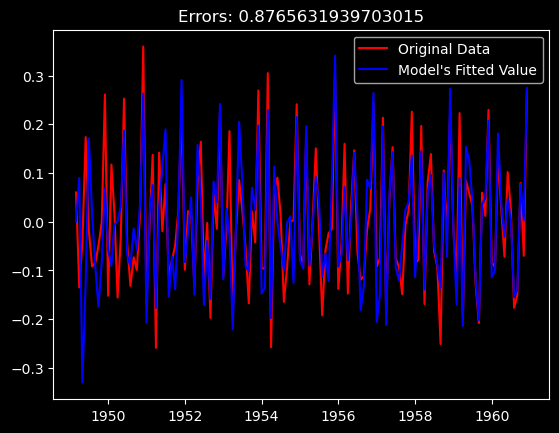

In [44]:
plt.plot(df_log_diff2, label = "Original Data", color = "red")
plt.plot(main_result.fittedvalues, color = "blue", label = "Model's Fitted Value")
plt.title(f"Errors: {main_errors}")

plt.legend()
plt.show()

In [45]:
pred = main_result.predict(1,143 + 60)

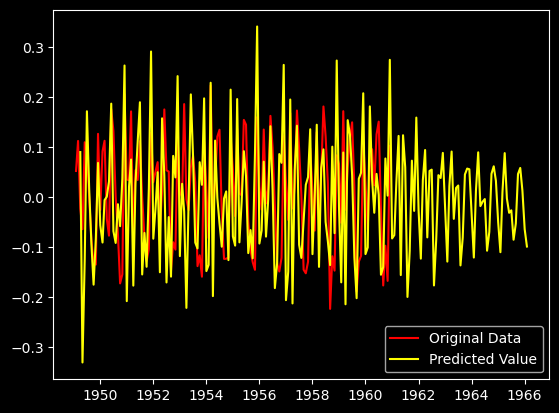

In [46]:
plt.plot(df_log_diff1, label = "Original Data", color = "red")
plt.plot(pred, color = "yellow", label = "Predicted Value")
plt.legend()
plt.show()

In [47]:
# the reason pred data is falling is -
# - in the model the seasonality is there so this can be a reason
# - not stationary
# - too small data

# maybe we can use sarimax

## **SARIMA**

In [48]:
# Define the parameters p,d,q (assumers range)
p = d = q = range(0,2)

# Genrate all possible combinations of the triplets
pdq = list(itertools.product(p, d, q))

In [49]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [50]:
len(pdq)

8

In [51]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

In [52]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
best_aic = float('inf')
best_order = None
best_seasonal_order = None

In [55]:
for x in pdq:
    for y in seasonal_pdq:
        try:
            model = SARIMAX(df_log_diff2,
                            order=x,
                            seasonal_order = y)
            results = model.fit()

            if results.aic<best_aic:
                best_aic=results.aic
                best_order = x
                best_seasonal_order = y
                print(f"SARIMA{x}x{y} - AIC: {results.aic}")
        except:
            continue

print(f"Best Model: SARIMA{best_order}x{best_seasonal_order}, AIC : {best_aic}")

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: -164.71245448515714
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: -248.17470726818505
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: -302.52630047700245
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: -335.6769168246735
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: -350.8026411894757
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: -423.4821807538277
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: -454.55546136560685
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: -479.52954898466055
SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC: -488.4441270377042
Best Model: SARIMA(1, 0, 1)x(1, 0, 1, 12), AIC : -488.4441270377042


In [56]:
final_model1 = SARIMAX(df_log_diff2, order = best_order, seasonal_order = best_seasonal_order)

In [57]:
results1 = final_model1.fit()

In [58]:
print("""
forecasted values from the SARIMA model are in log-differenced form, 
not the original scale (number of passengers). 
Since we trained the model on df_log_diff2 (i.e., second-order differenced log-transformed data),
the predictions are in that transformed space.

✅ To convert the forecast back to the original passenger count, we need to:
Reverse the differencing (twice).

Reverse the log transformation (i.e., apply exp).
""")


forecasted values from the SARIMA model are in log-differenced form, 
not the original scale (number of passengers). 
Since we trained the model on df_log_diff2 (i.e., second-order differenced log-transformed data),
the predictions are in that transformed space.

✅ To convert the forecast back to the original passenger count, we need to:
Reverse the differencing (twice).

Reverse the log transformation (i.e., apply exp).



In [59]:
forecast_diff2 = results1.forecast(steps=60)
print(forecast_diff2.head())

1961-01-01   -0.067073
1961-02-01   -0.090172
1961-03-01    0.172727
1961-04-01   -0.094291
1961-05-01    0.008431
Freq: MS, Name: predicted_mean, dtype: float64


## **Forecast**

In [60]:
# Ensure scalars, not Series with timestamp indices
last_diff1 = df_log_orig.diff().iloc[-1, 0]  # If df_log_orig is a DataFrame
last_log = df_log_orig.iloc[-1, 0]

# Reverse second diff
forecast_diff1 = forecast_diff2.cumsum() + last_diff1
forecast_log = forecast_diff1.cumsum() + last_log

# Convert back to actual passengers
forecast_final = np.exp(forecast_log)


In [61]:
forecast_final

1961-01-01    447.479704
1961-02-01    423.546966
1961-03-01    476.479638
1961-04-01    487.794620
1961-05-01    503.606383
1961-06-01    575.968241
1961-07-01    658.862637
1961-08-01    656.139136
1961-09-01    551.234638
1961-10-01    491.347018
1961-11-01    426.131903
1961-12-01    472.275194
1962-01-01    488.794701
1962-02-01    462.831426
1962-03-01    520.132859
1962-04-01    532.323973
1962-05-01    549.371494
1962-06-01    627.605770
1962-07-01    717.126108
1962-08-01    714.082207
1962-09-01    600.591537
1962-10-01    535.715118
1962-11-01    465.028193
1962-12-01    514.923902
1963-01-01    532.726031
1963-02-01    504.558652
1963-03-01    566.463225
1963-04-01    579.560122
1963-05-01    597.898083
1963-06-01    682.283022
1963-07-01    778.733983
1963-08-01    775.342754
1963-09-01    652.847285
1963-10-01    582.729430
1963-11-01    506.289766
1963-12-01    560.116574
1964-01-01    579.255341
1964-02-01    548.767475
1964-03-01    615.488843
1964-04-01    629.525005


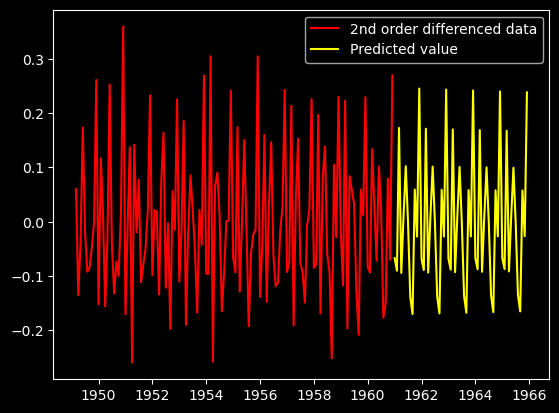

In [62]:
plt.plot(df_log_diff2, color = "red", label = "2nd order differenced data")
plt.plot(forecast_diff2, color = "yellow", label = "Predicted value")
plt.legend()
plt.show()

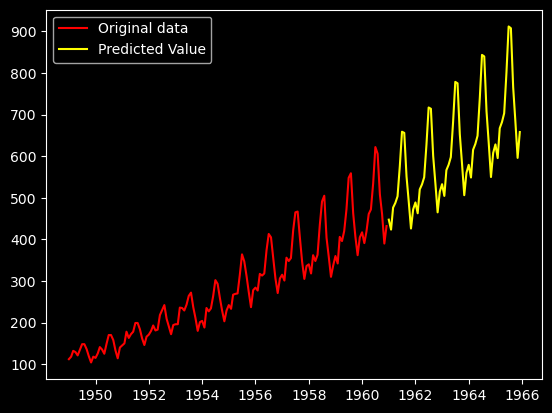

In [63]:
plt.plot(df, color = "red", label = "Original data")
plt.plot(forecast_final, color = "yellow", label = "Predicted Value")
plt.legend()
plt.show()

In [64]:
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  142
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 249.222
Date:                            Wed, 23 Apr 2025   AIC                           -488.444
Time:                                    01:05:52   BIC                           -473.665
Sample:                                03-01-1949   HQIC                          -482.438
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2998      0.068     -4.435      0.000      -0.432      -0.167
ma.L1         -0.9923      0.096   

## **Accuracy**

In [65]:
# Assume df['#Passengers'] is the original data
train = df.iloc[:-12]
test = df.iloc[-12:]

In [66]:
train_log = np.log(train)

In [67]:
train_log_diff2 = train_log.diff().diff().dropna()

In [68]:
final_model2 = SARIMAX(train_log_diff2, order=best_order, seasonal_order=best_seasonal_order)
results2 = final_model2.fit()

# Reverse second diff
forecast_train_diff2 = results2.forecast(steps=60)
forecast_train_diff1 = forecast_diff2.cumsum() + df_log_orig.diff().iloc[-1, 0]
forecast_train_log = forecast_diff1.cumsum() + df_log_orig.iloc[-1, 0]

In [69]:
forecast_final2 = np.exp(forecast_train_log)  # As we discussed earlier
forecast_final2.head()

1961-01-01    447.479704
1961-02-01    423.546966
1961-03-01    476.479638
1961-04-01    487.794620
1961-05-01    503.606383
Freq: MS, Name: predicted_mean, dtype: float64

In [70]:
y_true = test['#Passengers'].values
y_pred = forecast_final2[:len(test)].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"R² Score: {r2:.2f}")


MAE  : 38.07
MSE  : 1523.18
RMSE : 39.03
MAPE : 8.12%
R² Score: 0.73


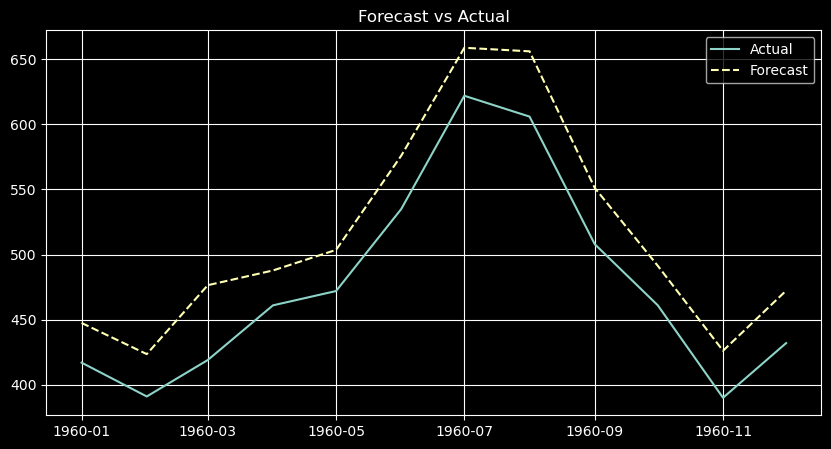

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test.index, y_true, label='Actual')
plt.plot(test.index, y_pred, label='Forecast', linestyle='--')
plt.legend()
plt.title("Forecast vs Actual")
plt.grid(True)
plt.show()


In [72]:
print(results2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 229.202
Date:                            Wed, 23 Apr 2025   AIC                           -448.403
Time:                                    01:05:54   BIC                           -434.066
Sample:                                03-01-1949   HQIC                          -442.577
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2762      0.076     -3.648      0.000      -0.425      -0.128
ma.L1         -0.9941      0.084   